# Using Unsupervised Learning to plan her Paris Vacation: A Clustering Problem

## Preparing the data

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as Soup

In [2]:
map_kml = "doc.kml" # imported kml file from Google Maps
with open('doc.kml') as data:
    kml_soup = Soup(data, 'lxml-xml') # Parse as XML
coords = kml_soup.find_all('coordinates') # find all the coordinates
coords_list = []
for x in coords:
    coords_list.append(str(x)) # store the coordinates in a list

In [3]:
names = kml_soup.find_all('name') # find all the coordinates
names_list = []
for x in names:
    names_list.append(str(x)) # store the coordinates in a list

In [4]:
# create new dataframe
coord_col = ['Longitude', 'Latitude', 'Landmark']
df_coord = pd.DataFrame(columns=coord_col) 
# split coordinates list into coordinates to populate the dataframe
for i, j in zip(range(len(coords_list)), range(2, len(names_list))):
    item = coords_list[i]
    string_split = item.split(',')
    coord1 = float(string_split[0][26:])
    coord2 = float(string_split[1])
    coord3 = names_list[j][6:-7]
    df_coord.loc[i] = [coord1, coord2, coord3]

In [5]:
df_coord

,Longitude,Latitude,Landmark
0,2.328729,48.846361,French Alliance Paris Ile-De-France
1,2.289282,48.861596,Trocadéro Gardens
2,2.294483,48.858370,Eiffel Tower
3,2.340802,48.886503,Place du Tertre
4,2.343023,48.886706,The Basilica of the Sacred Heart of Paris
5,2.300375,48.871669,Louis Vuitton Maison Champs Élysées
6,2.330479,48.873820,Galeries Lafayette
7,2.327793,48.873977,Printemps Haussmann
8,2.331767,48.871934,Palais Garnier
9,2.337644,48.860611,Louvre Museum


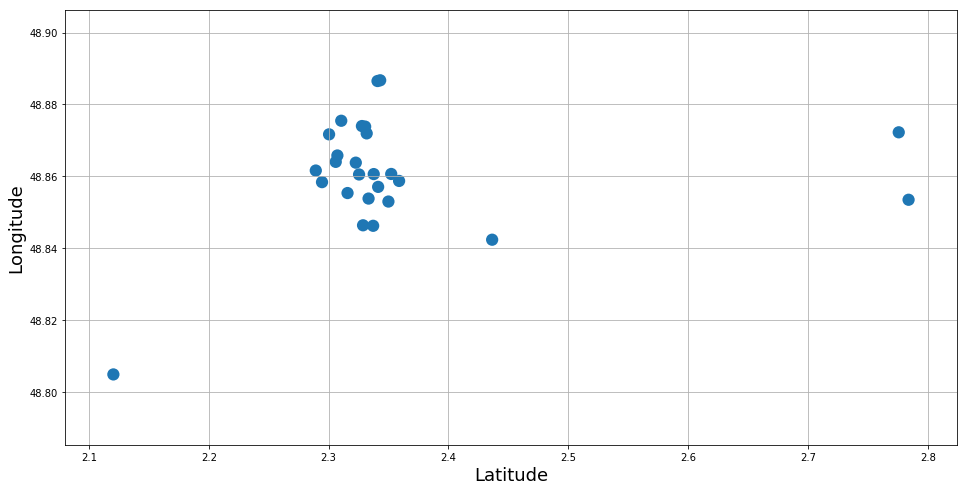

In [6]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(df_coord['Longitude'], df_coord['Latitude'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.xlabel('Latitude', fontsize=18)
plt.ylabel('Longitude', fontsize=18)
plt.grid()
plt.show()

## k-means Clustering of Geo Locations

In [7]:
from sklearn.cluster import KMeans # Importing KMeans
# Creating an instance of KMeans to find 10 clusters
kmeans_1 = KMeans(n_clusters=10)
# Using fit_predict to cluster the dataset
X = df_coord[['Longitude','Latitude']].values
predictions = kmeans_1.fit_predict(X) 

In [8]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)

In [9]:
clustered.drop('index', axis=1, inplace=True)

In [10]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8,
    clustered['Cluster'] == 9 ]
choices = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 
           'Sunday', 'Monday', 'Tuesday', 'Wednesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')

In [11]:
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Vacation Day
6,2.330479,48.873820,Galeries Lafayette,0,Monday
7,2.327793,48.873977,Printemps Haussmann,0,Monday
8,2.331767,48.871934,Palais Garnier,0,Monday
12,2.775808,48.872234,Disneyland Paris,1,Tuesday
17,2.784017,48.853465,La Vallée Village,1,Tuesday
10,2.120355,48.804865,Palace of Versailles,2,Wednesday
20,2.436470,48.842348,Sainte-Chapelle de Vincennes,3,Thursday
23,2.315785,48.855334,Musée Rodin,4,Friday
21,2.322672,48.863788,Orangerie Museum,4,Friday
19,2.325417,48.860501,Gare Musée d'Orsay,4,Friday


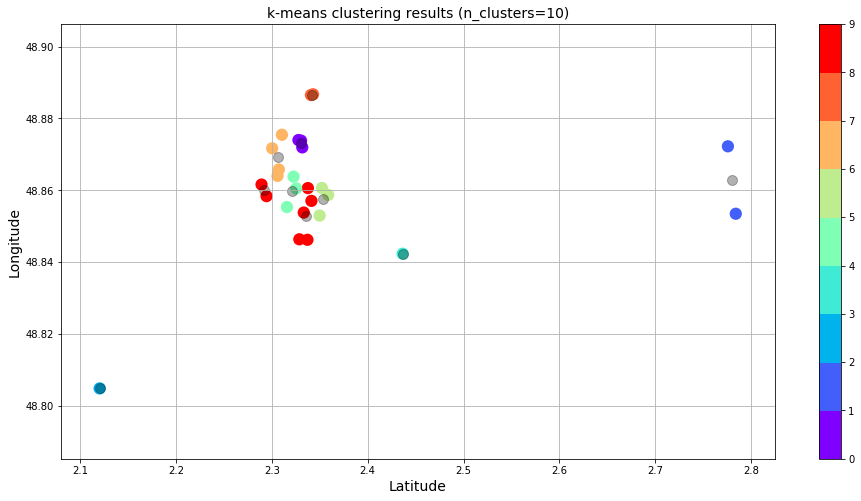

In [12]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=10)', fontsize=14)
plt.grid()
plt.show()

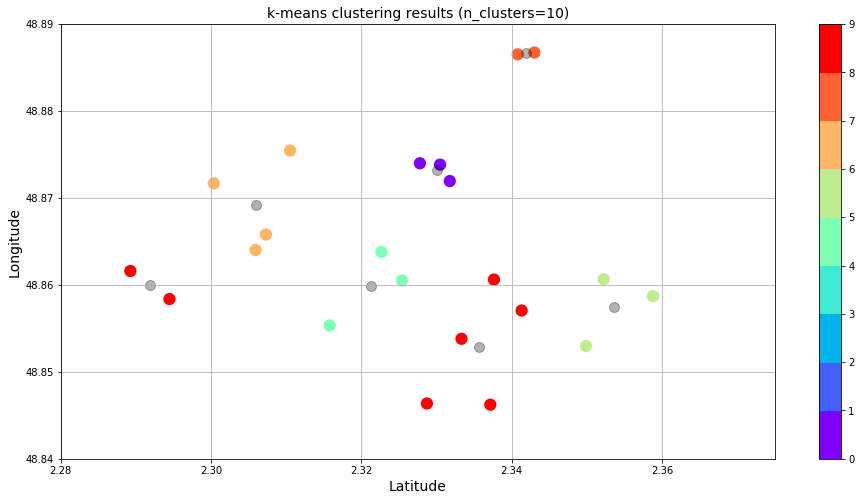

In [13]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
plt.xlim(2.28, 2.375)
plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=10)', fontsize=14)
plt.grid()
plt.show()

## HDBSCAN Clustering of Geo Locations

In [14]:
import hdbscan

In [15]:
rads = np.radians(X)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
predictions = clusterer.fit_predict(rads)

In [16]:
clustered = pd.concat([df_coord.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
clustered.drop('index', axis=1, inplace=True)
conditions = [
    clustered['Cluster'] == -1, 
    clustered['Cluster'] == 0,
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6,
    clustered['Cluster'] == 7,
    clustered['Cluster'] == 8 ]
choices = ['NA/Noise', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 
           'Friday','Saturday', 'Sunday', 'Monday', 'Tuesday' ]
clustered['Vacation Day'] = np.select(conditions, choices, default='black')
clustered.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Vacation Day
23,2.315785,48.855334,Musée Rodin,-1,NA/Noise
20,2.436470,48.842348,Sainte-Chapelle de Vincennes,-1,NA/Noise
10,2.120355,48.804865,Palace of Versailles,-1,NA/Noise
12,2.775808,48.872234,Disneyland Paris,0,Monday
17,2.784017,48.853465,La Vallée Village,0,Monday
3,2.340802,48.886503,Place du Tertre,1,Tuesday
4,2.343023,48.886706,The Basilica of the Sacred Heart of Paris,1,Tuesday
1,2.289282,48.861596,Trocadéro Gardens,2,Wednesday
2,2.294483,48.858370,Eiffel Tower,2,Wednesday
18,2.307314,48.865784,Champs-Élysées,3,Thursday


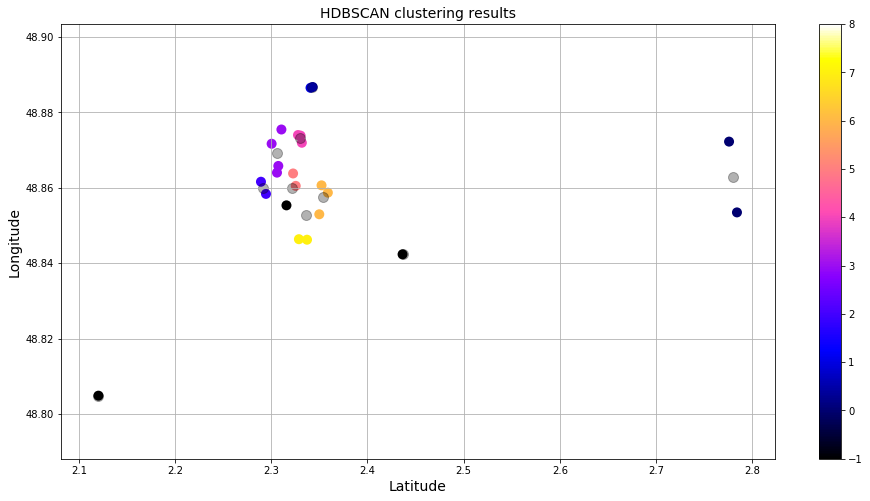

In [17]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.gnuplot2
#norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='none')
plt.colorbar(ticks=[-1,0,1,2,3,4,5,6,7,8])
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
#plt.xlim(2.28, 2.375)
#plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid()
plt.show()

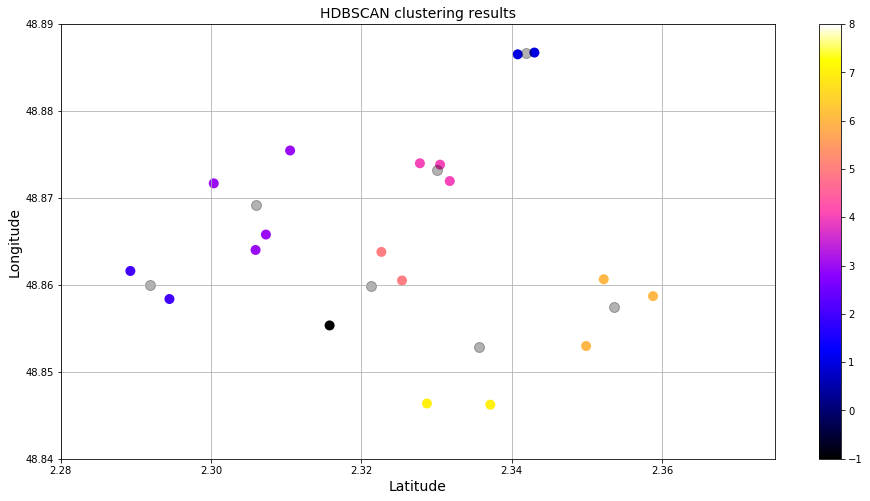

In [18]:
fig = plt.figure(figsize=(16,8))
cmap=plt.cm.gnuplot2
#norm = matplotlib.colors.BoundaryNorm(np.arange(0,10,1), cmap.N)
plt.scatter(clustered['Longitude'], clustered['Latitude'], c=clustered['Cluster'],
            cmap=cmap, s=100, edgecolor='none')
plt.colorbar(ticks=[-1,0,1,2,3,4,5,6,7,8])
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.3);
plt.xlim(2.28, 2.375)
plt.ylim(48.84, 48.89)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('HDBSCAN clustering results', fontsize=14)
plt.grid()
plt.show()